In [5]:
import json
import os

# Collect Data

In [3]:
# Read each line of the file and store it as an item in a list
lines_as_list = []
with open('/Users/thenning/Documents/GitHub/LLM_Bubbles/bot-data/real-experiment-runs/runs.metadata', 'r') as file:
    for line in file:
        lines_as_list.append(line.strip())  # Use strip() to remove leading/trailing whitespace

# Print the list of lines
print(f"Total lines: {len(lines_as_list)}")
print(lines_as_list[:10])  # Print the first 10 lines for inspection

agent_runs = {}

# Iterate through the list
for line in lines_as_list:
    parts = line.split('|')  # Split by the '|' delimiter
    run_number = parts[1].strip()  # Extract the run number
    agent_name = parts[2].strip()  # Extract the agent name

    # Add the run number to the list for the agent
    if agent_name not in agent_runs:
        agent_runs[agent_name] = []
    agent_runs[agent_name].append(run_number)

# Print the resulting dictionary
print(agent_runs)

dir = rf'/Users/thenning/Documents/GitHub/LLM_Bubbles/bot-data/real-experiment-runs'
# Loop through the agents in agent_runs
for agent in agent_runs.keys():
    
    # Transform the list of runs into a dictionary
    runs = agent_runs[agent]  # Get the list of runs
    agent_runs[agent] = {}  # Replace it with an empty dictionary
    
    # Iterate through the runs for each agent
    for run in runs:
        
        # Construct the file path
        agent_path = rf"{dir}/{run}/all-rounds-compressed.json"
        
        # Assign the path to the run
        agent_runs[agent][run] = agent_path

# Print the final agent_runs dictionary to verify
print(agent_runs)


Total lines: 24
['2025-01-06 23:49:24.064839 | run-1 | gpt-3.5 | 20 subjects | Experiment 1/3 w/ 20 subjects and 3.5 using standard profit maximizing prompt + fixed auto timeout take 2 | hrei2bal', '2025-01-07 10:56:18.560119 | run-2 | gpt-3.5 | 20 subjects | Experiment 2/3 w/ 20 subjects and 3.5 using standard profit maximizing prompt + fixed auto timeout take 2 | ne4pwggz', '2025-01-07 19:11:15.278792 | run-3 | gpt-3.5 | 20 subjects | Experiment 3/3 w/ 20 subjects and 3.5 using standard profit maximizing prompt + fixed auto timeout take 2 | lwnwomh2', '2025-01-07 20:56:24.718525 | run-4 | gemini-1.5-pro | 20 subjects | Experiment 1/3 w/ 20 subjects and gemini-1.5-pro using standard profit maximizing prompt (paused due to evac) | yy9pw5g4', '2025-01-09 23:25:43.977014 | run-5 | gemini-1.5-pro | 20 subjects | Experiment 1/3 w/ 20 subjects and gemini-1.5-pro using standard profit maximizing prompt | 1vpzr064', '2025-01-10 01:10:52.342729 | run-6 | gemini-1.5-pro | 20 subjects | Experime

In [38]:
# Function to load JSON data
def load_json_files(path):
    if os.path.exists(path):  # Check if the file exists
        try:
            with open(path, 'r') as file:
                json_data = json.load(file)  # Load JSON content
        except json.JSONDecodeError as e:  # Handle invalid JSON
            json_data = f"Error decoding JSON: {e}"
    else:
        json_data = f"File not found: {path}"
    return json_data

# Load the JSON files

exp1 = load_json_files(agent_runs['gpt-3.5']['run-1'])
exp1

{'Practice Round 1': [{'round_num': 1,
   'timestamp': '2025-01-06 23:49:52',
   'forecast': [{'forecasted_round': 1,
     'lb': 0,
     'ub': 30,
     'field': 'f0',
     'input_forecast': '17'},
    {'forecasted_round': 3,
     'lb': 0,
     'ub': 30,
     'field': 'f1',
     'input_forecast': '16'},
    {'forecasted_round': 6,
     'lb': 0,
     'ub': 35,
     'field': 'f2',
     'input_forecast': '19'},
    {'forecasted_round': 11,
     'lb': 0,
     'ub': 45,
     'field': 'f3',
     'input_forecast': '22'}],
   'risk_selections': [],
   'portfolio_state': {'num_shares': 4,
    'current_cash': 109.0,
    'stock_value': 60.0,
    'dividend_earned': 4.0,
    'interest_earned': 5.0,
    'submitted_orders': [],
    'executed_trades': [],
    'round_finished': True},
   'market_state': {'market_price': 15.0,
    'interest_rate': '5%',
    'dividends': '0.4 or 1.0',
    'buy_back': 14.0,
    'volume': 2,
    'round_finished': True},
   'plan': 'I plan to continue monitoring market trend

# Fundamentals

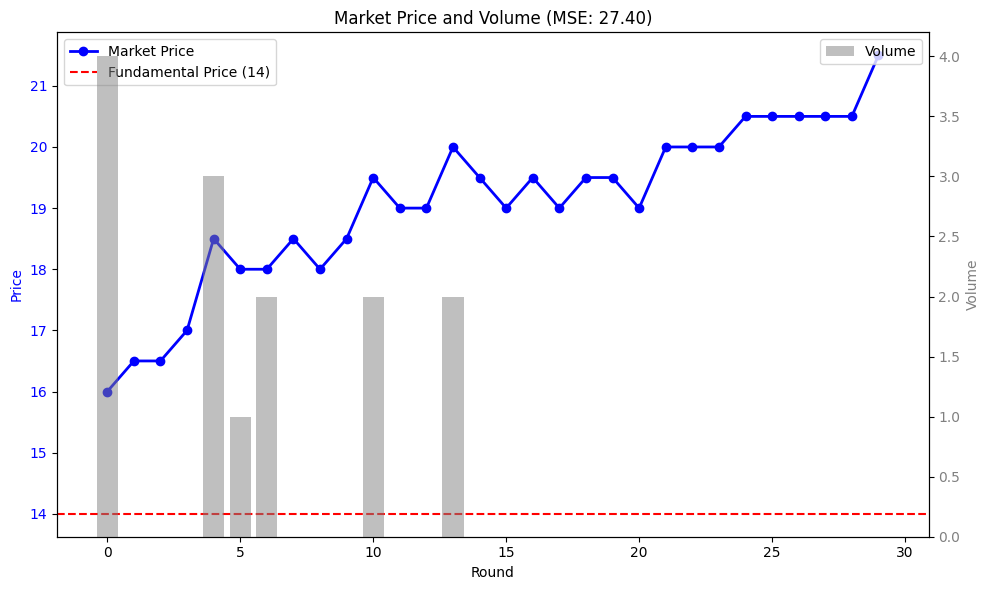

np.float64(27.4)

In [59]:
import matplotlib.pyplot as plt
import numpy as np

def basic_market_stats(model, run):
        
    exp1 = load_json_files(agent_runs[model][run])

    # Assuming `exp1` is already defined and populated
    price = []
    volume = []
    fundamental_price = 14

    for round in exp1.keys():
        if "Practice" in round:
            continue
        else:
            price.append(exp1[round][0]['market_state']['market_price'])
            volume.append(exp1[round][0]['market_state']['volume'])

        # Calculate Mean Squared Error (MSE)
    mse = np.mean((np.array(price) - fundamental_price) ** 2)

    # Plotting
    fig, ax1 = plt.subplots(figsize=(10, 6))

    # Price line plot
    ax1.plot(price, label="Market Price", color="blue", marker="o", linewidth=2)
    ax1.axhline(fundamental_price, color="red", linestyle="--", label="Fundamental Price (14)")
    ax1.set_ylabel("Price", color="blue")
    ax1.set_xlabel("Round")
    ax1.tick_params(axis="y", labelcolor="blue")
    ax1.legend(loc="upper left")

    # Volume bar chart
    ax2 = ax1.twinx()
    ax2.bar(range(len(volume)), volume, alpha=0.5, color="gray", label="Volume")
    ax2.set_ylabel("Volume", color="gray")
    ax2.tick_params(axis="y", labelcolor="gray")
    ax2.legend(loc="upper right")

    # Title including MSE
    plt.title(f"Market Price and Volume (MSE: {mse:.2f})")

    # Adjust layout and show the plot
    plt.tight_layout()
    plt.show()

    return mse


basic_market_stats('gpt-3.5','run-3')


gpt-3.5
run-1


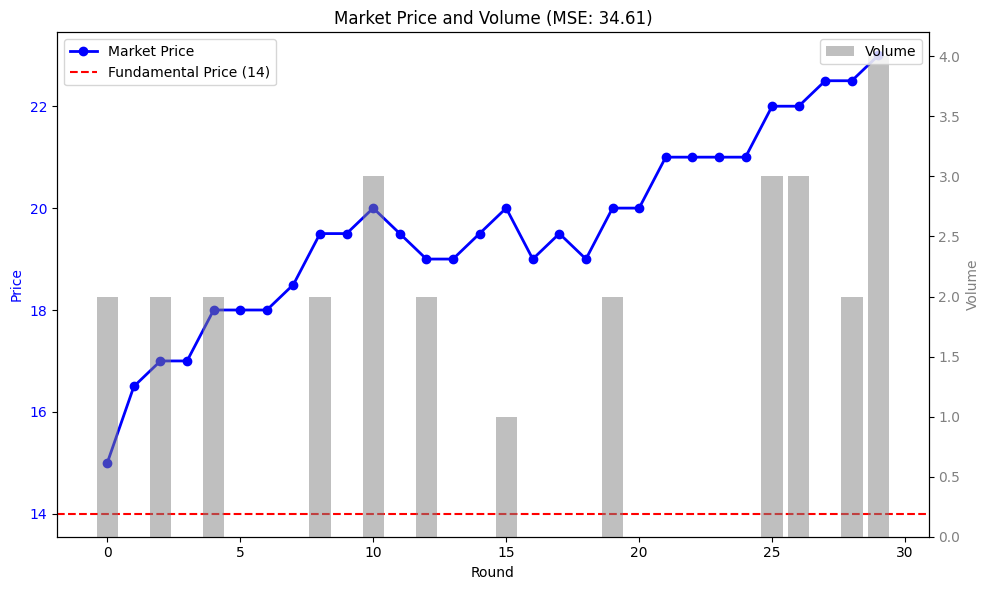

run-2


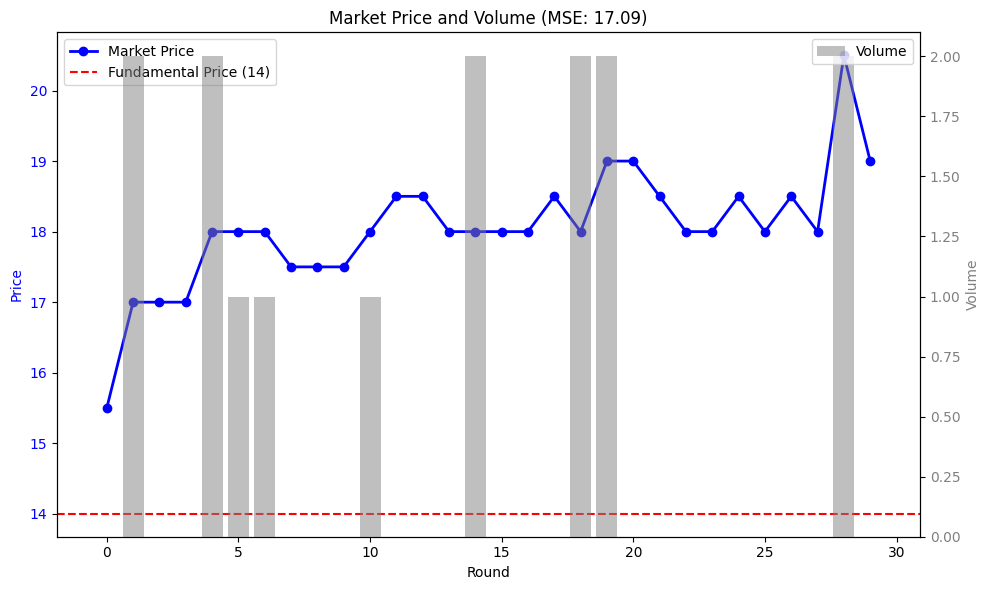

run-3


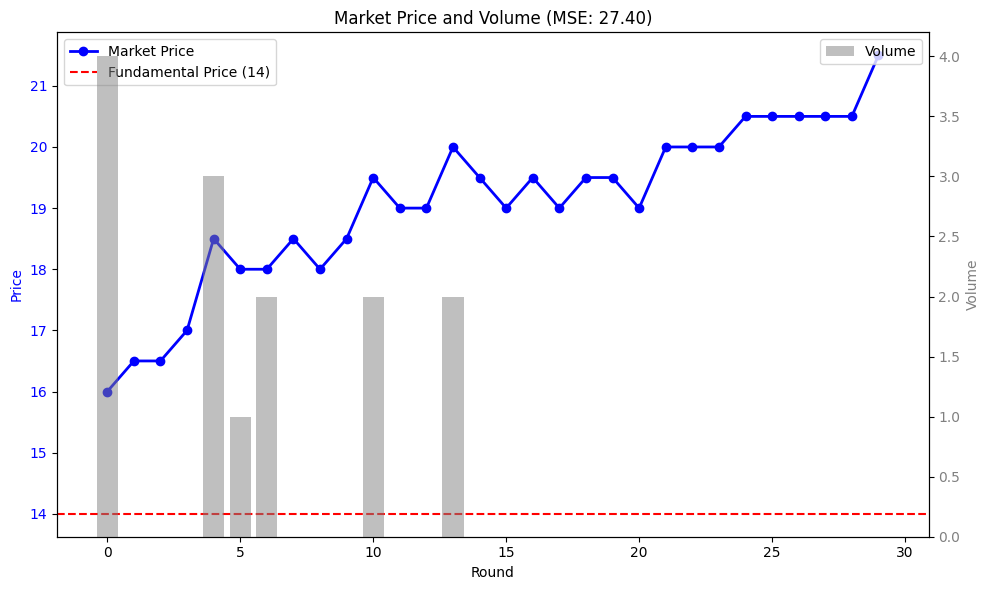

gemini-1.5-pro
run-4


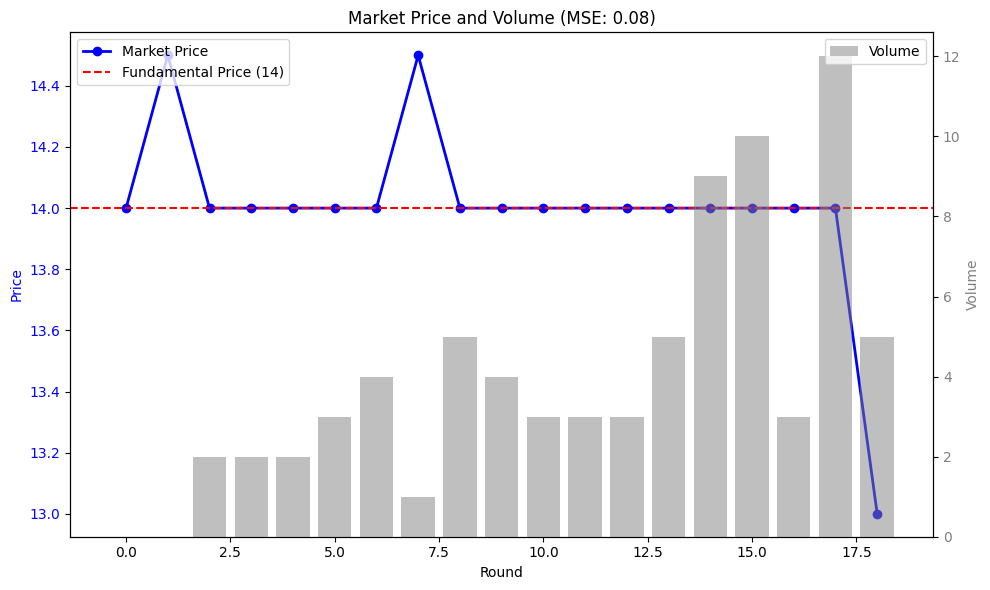

run-5


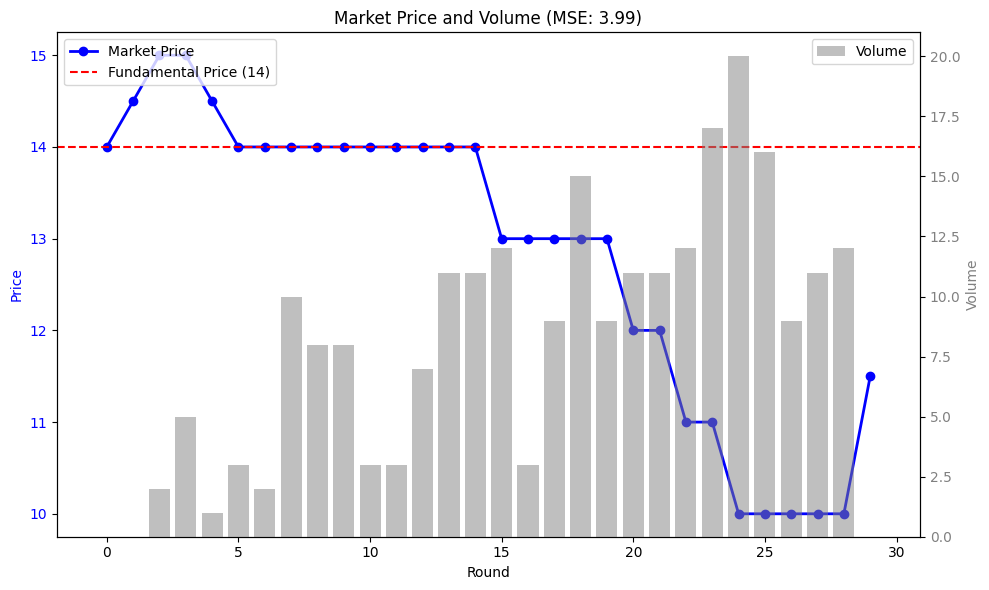

run-6


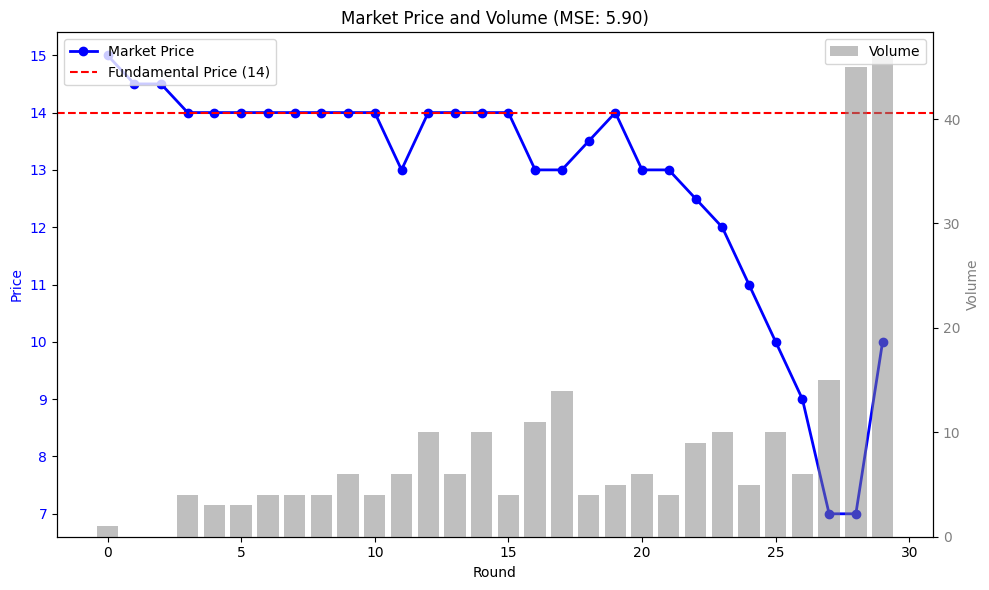

run-7


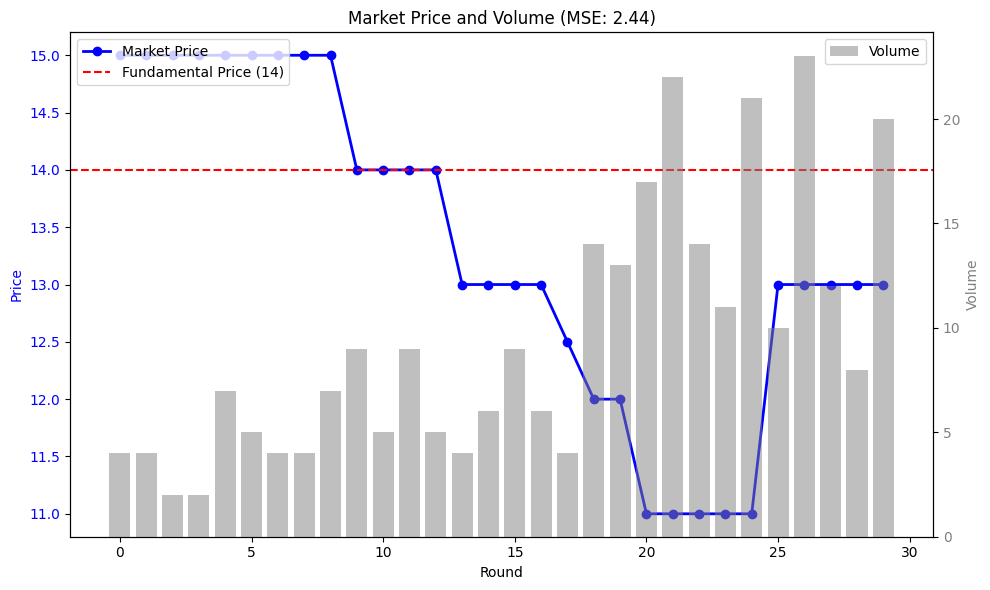

gpt-4o
run-8


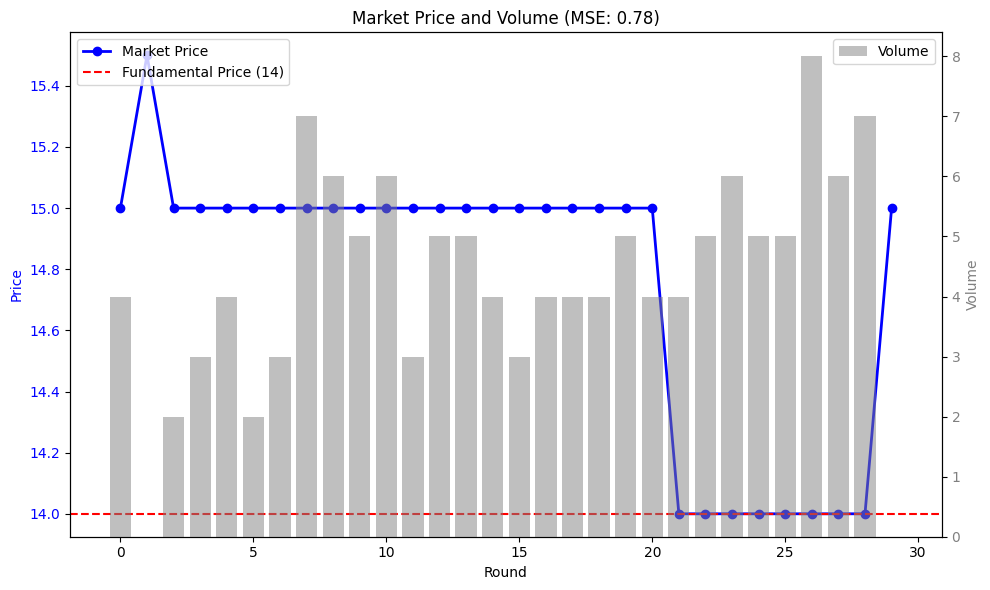

run-9


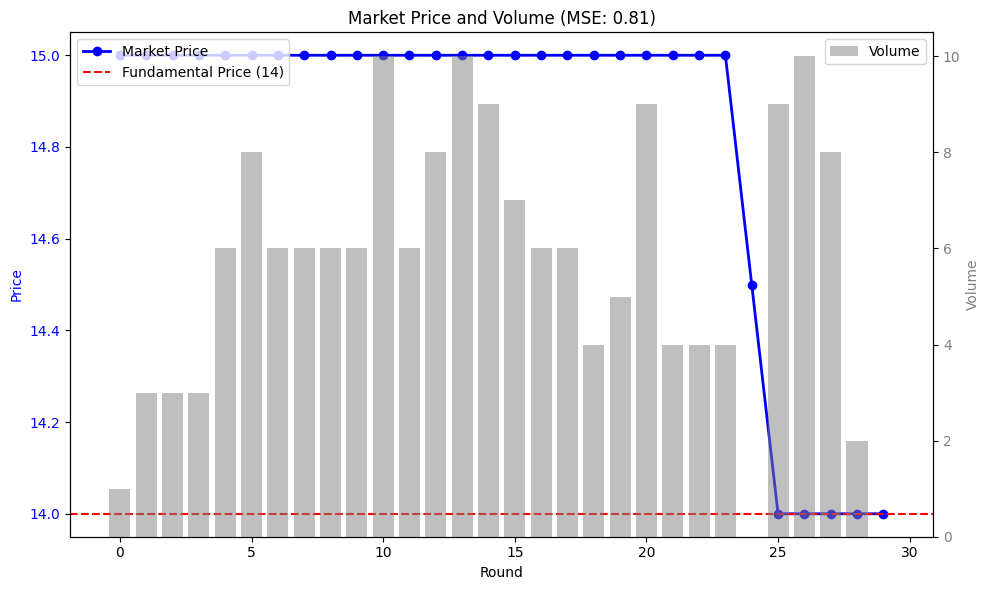

run-10


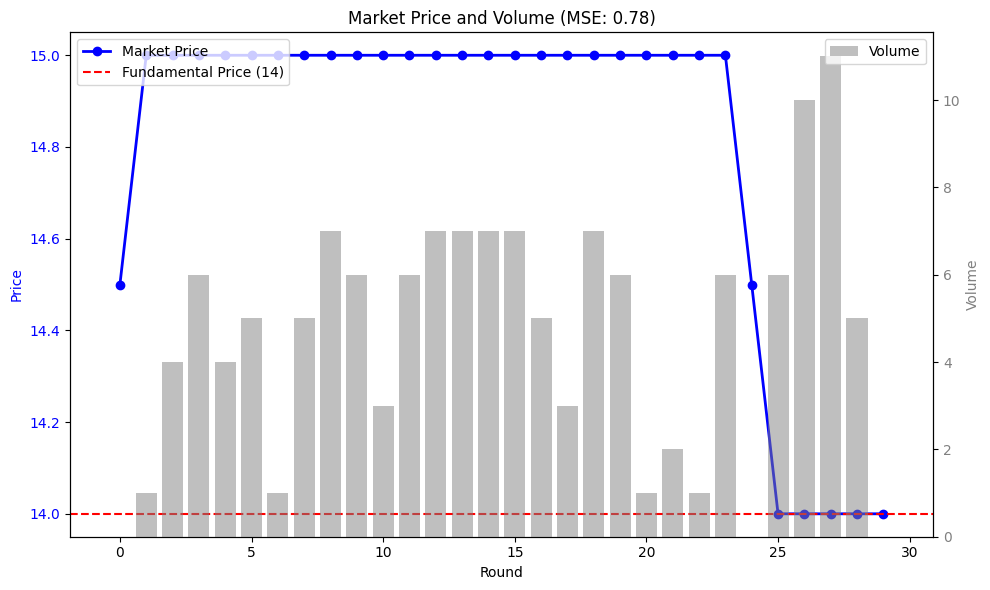

mistral-large
run-11


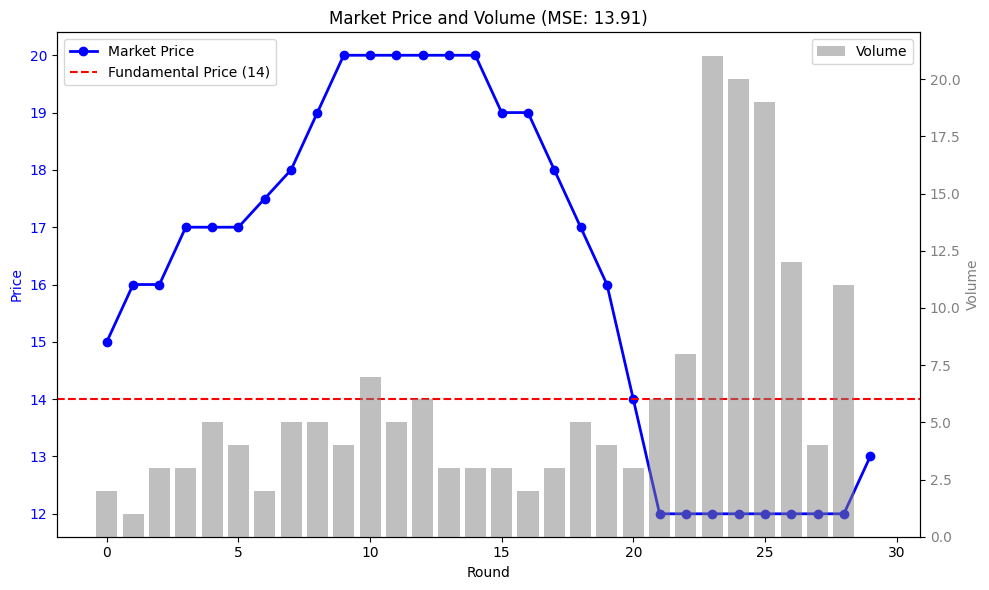

run-12


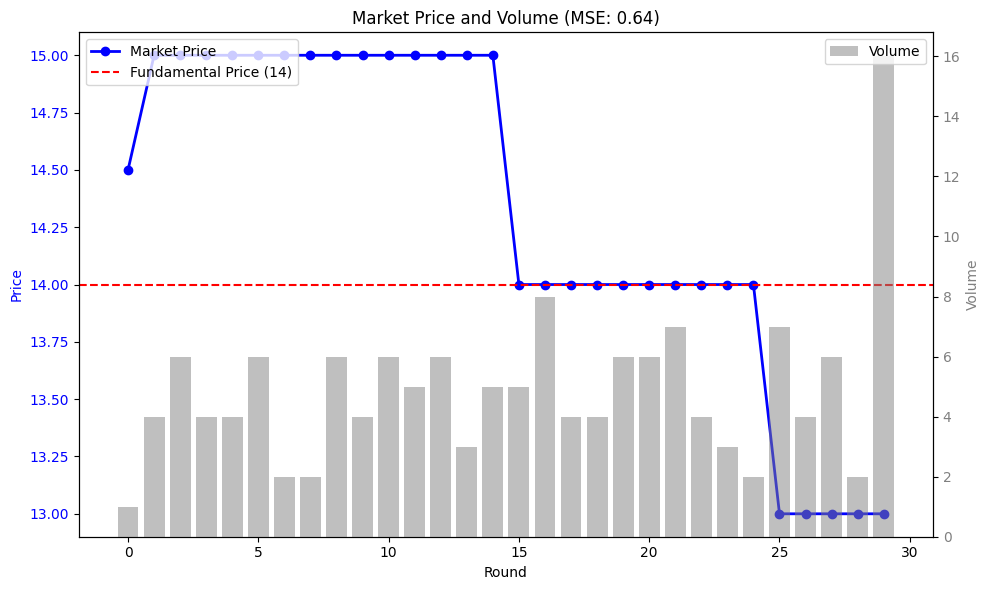

run-13


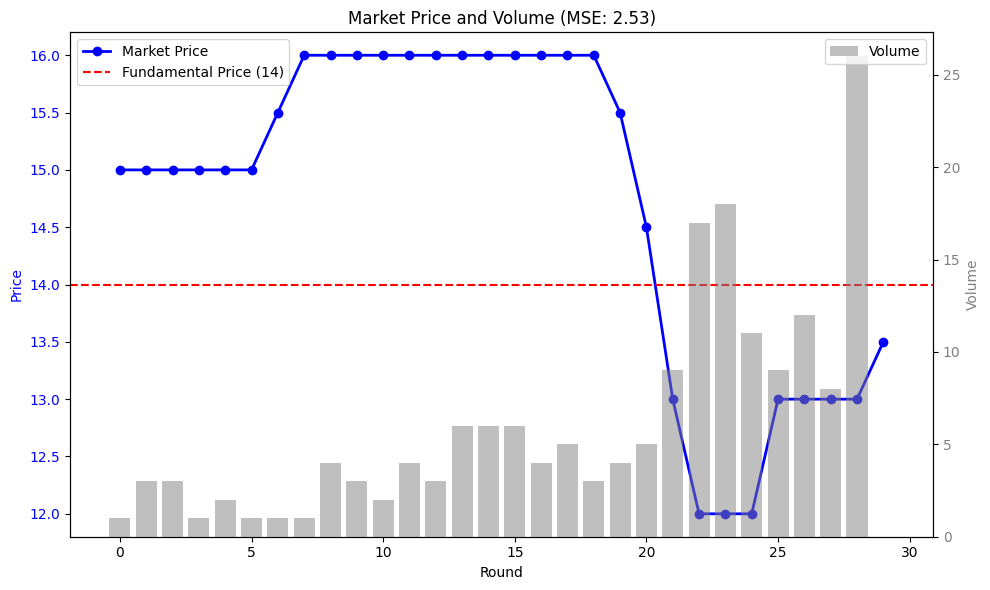

grok-2
run-14


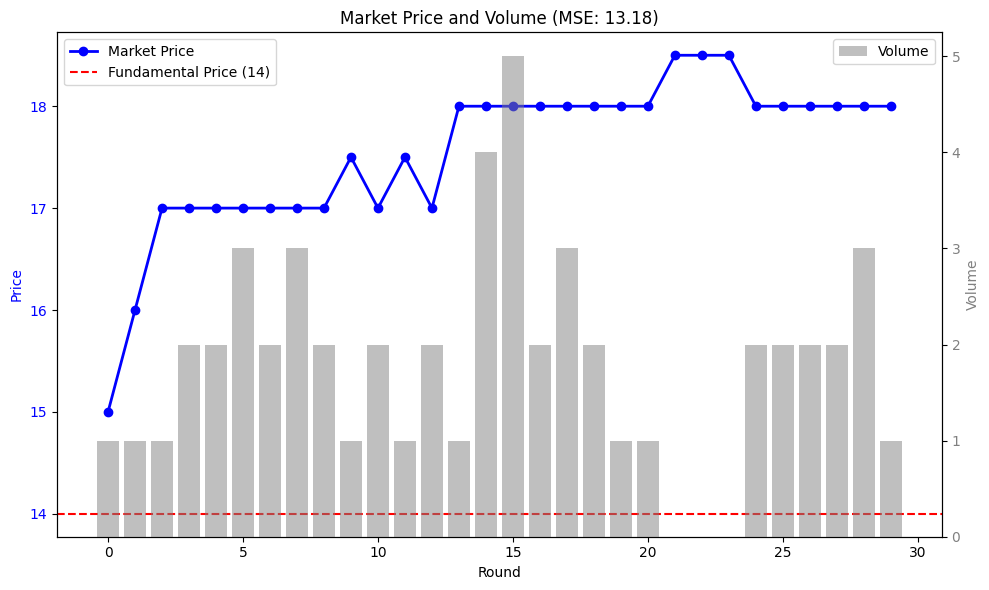

run-15


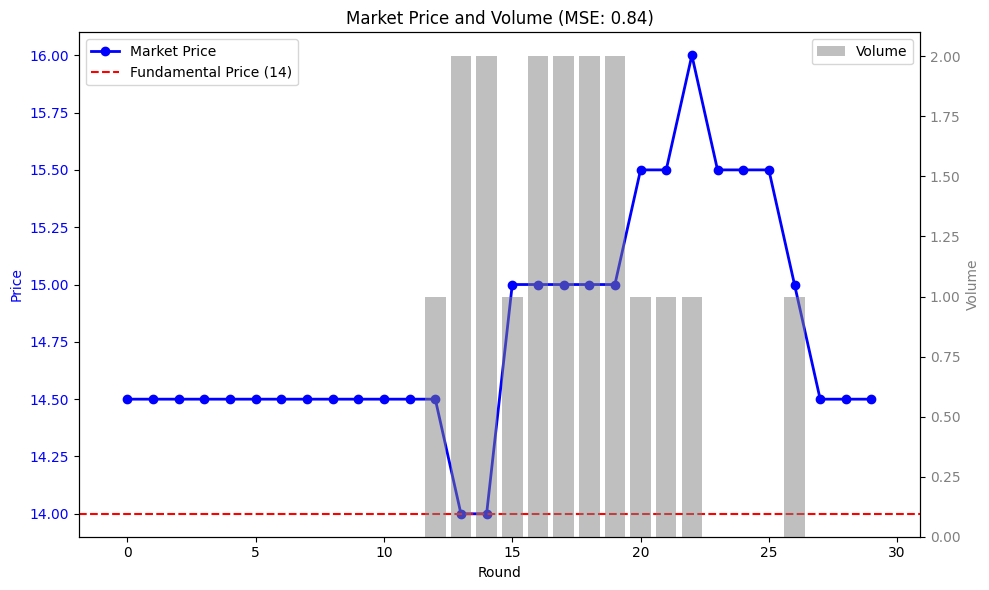

run-16


/Users/thenning/Documents/GitHub/LLM_Bubbles/.venv/lib/python3.12/site-packages/numpy/_core/fromnumeric.py:3860: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/thenning/Documents/GitHub/LLM_Bubbles/.venv/lib/python3.12/site-packages/numpy/_core/_methods.py:145: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


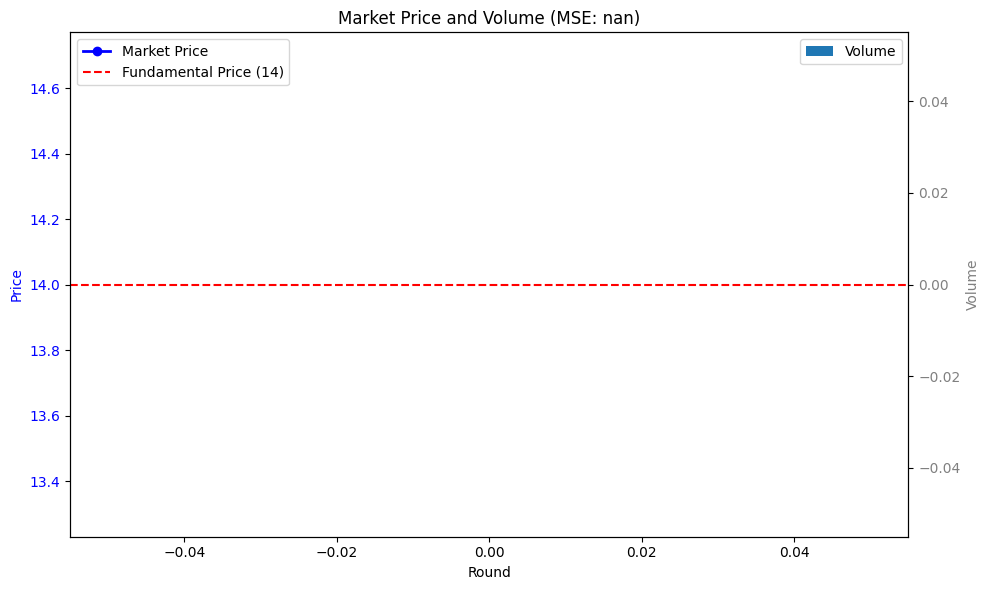

run-17


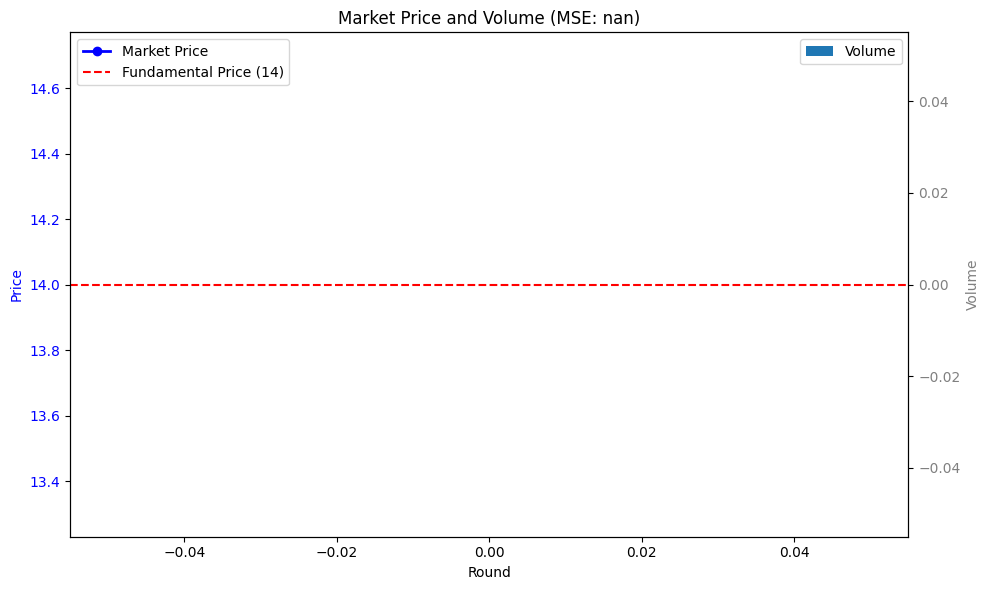

run-18


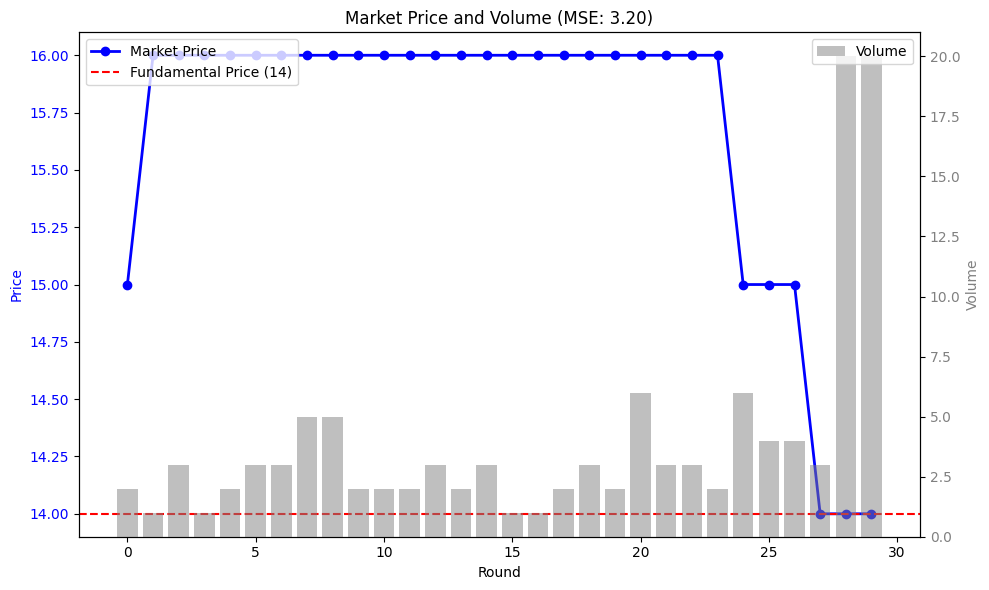

claude-3.5-sonnet
run-19


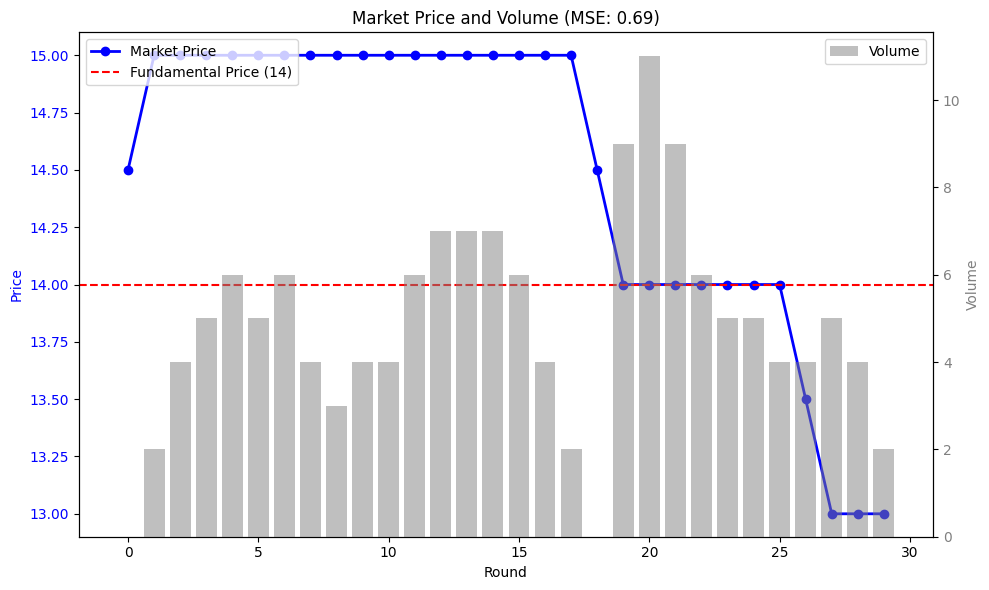

run-20


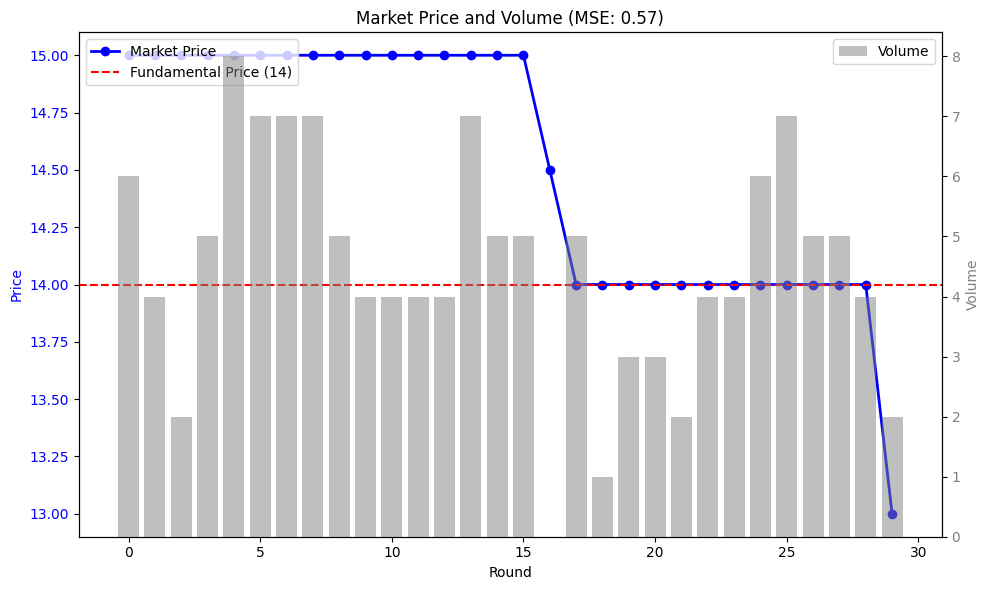

run-21


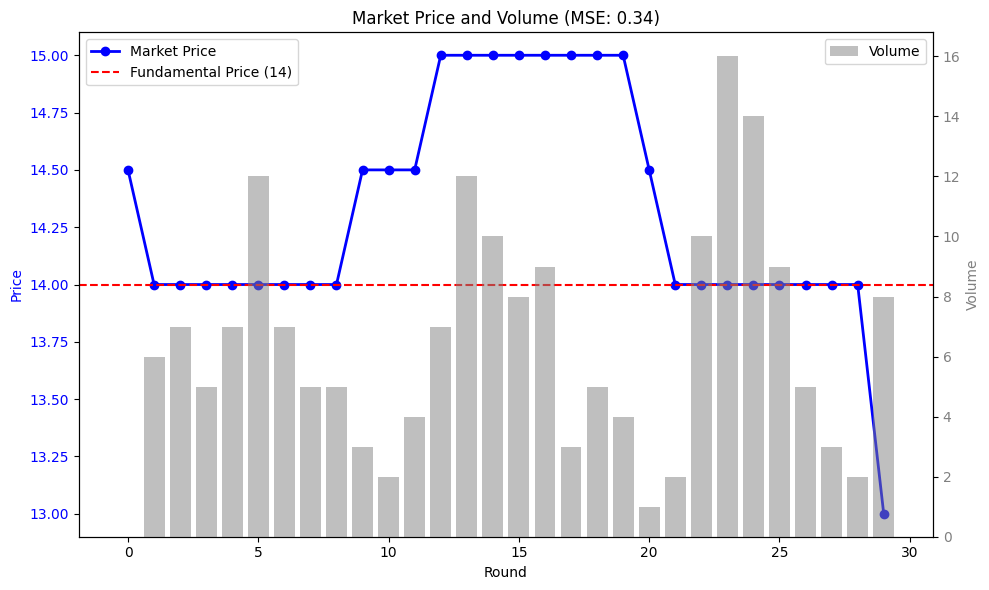

mixed
run-22


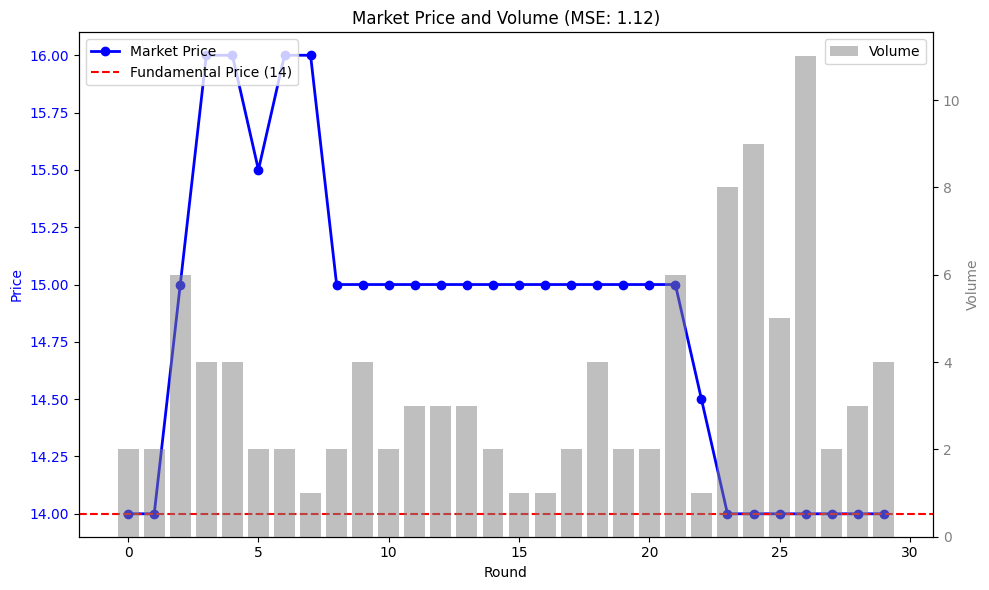

run-23


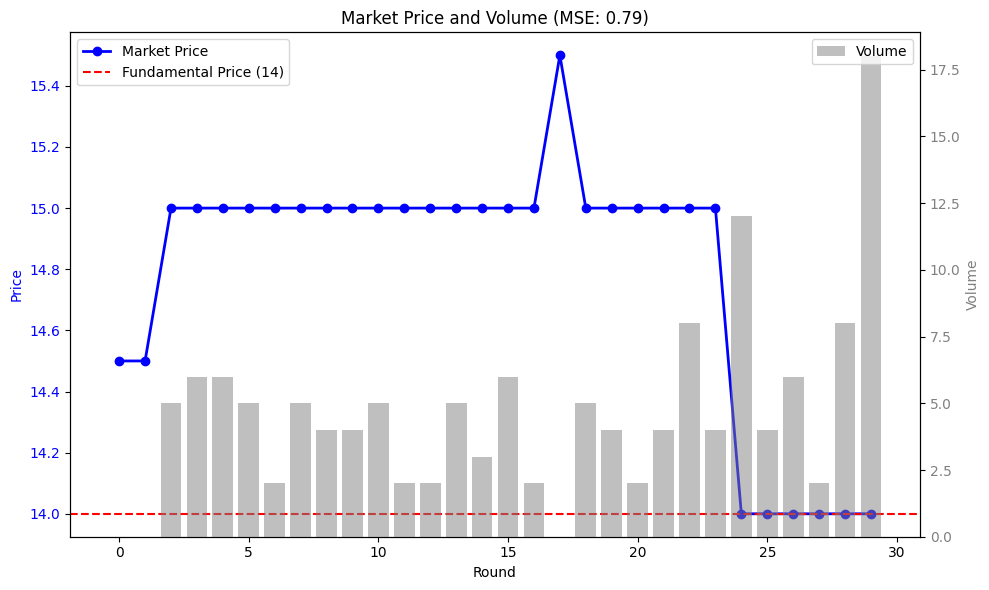

run-24


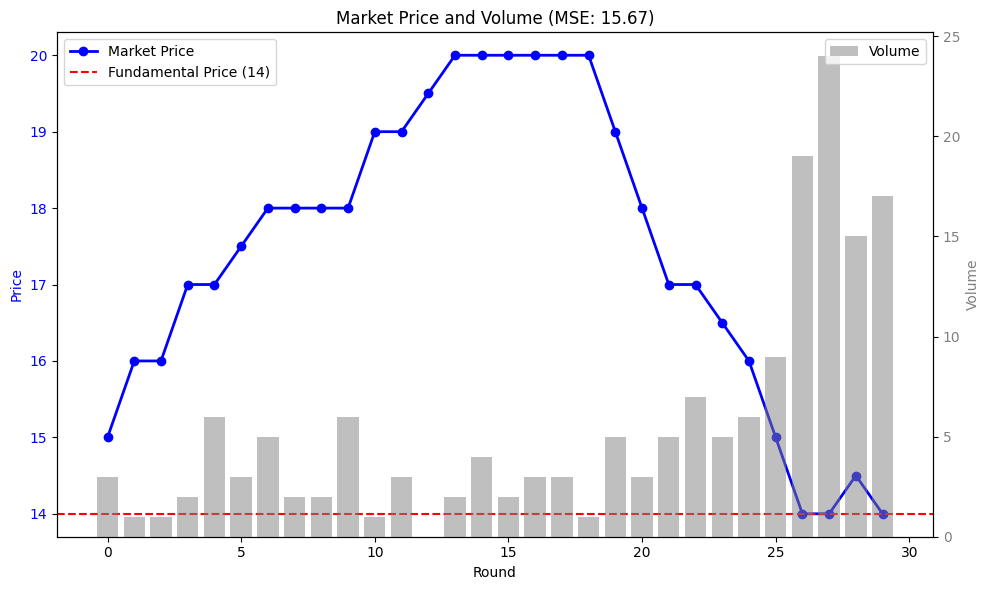

In [61]:
model_mse = {}
for model in agent_runs.keys():
    print(model)
    model_mse[model] = []
    for run in agent_runs[model].keys():
        print(run)
        model_mse[model].append(basic_market_stats(model, run))

## Average MSE

In [66]:
for model in model_mse.keys():
    print(model)
    print(np.mean(model_mse[model]))

gpt-3.5
26.366666666666664
gemini-1.5-pro
3.1030701754385968
gpt-4o
0.7888888888888889
mistral-large
5.6944444444444455
grok-2
nan
claude-3.5-sonnet
0.5361111111111111
mixed
5.858333333333333


# Human Markets

In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


full_data = pd.read_excel(r"/Users/thenning/Documents/GitHub/neurobubbles_rachael-master_tom/data/return_prediction/data_19markets_panel_570obs_mod.xlsx", engine="openpyxl")
full_data.columns

Index(['market_id', 'round', 'average_eda_ton_mean', 'average_hr_ton_mean',
       'average_bvp_ton_mean', 'average_temp_ton_mean', 'average_dose_r',
       'average_dose_mu', 'average_pl_f0', 'average_pl_f1', 'average_pl_f2',
       'average_pl_f3', 'average_volume', 'average_price',
       'average_log_returns', 'PC1', 'PC2', 'ma_pc1', 'ma_pc2', 'ma_dose_r',
       'ma_dose_mu', 'round_squared', 'remaining_rounds',
       'remaining_rounds_squared', 'std_eda_ton_mean', 'skewness_eda_ton_mean',
       'kurtosis_eda_ton_mean'],
      dtype='object')

In [74]:
full_data[full_data['round'] == 2]

,market_id,round,average_eda_ton_mean,average_hr_ton_mean,average_bvp_ton_mean,average_temp_ton_mean,average_dose_r,average_dose_mu,average_pl_f0,average_pl_f1,...,ma_pc1,ma_pc2,ma_dose_r,ma_dose_mu,round_squared,remaining_rounds,remaining_rounds_squared,std_eda_ton_mean,skewness_eda_ton_mean,kurtosis_eda_ton_mean
1,1,2,0.041854,1.018376,0.000471,0.526330,0.655997,2.999176,14.666667,15.333333,...,NaN,NaN,NaN,NaN,4,28,784,0.457375,0.052802,-1.850697
31,2,2,-0.540634,0.163361,-0.000328,-0.160194,0.423699,2.780971,15.800000,18.400000,...,NaN,NaN,NaN,NaN,4,28,784,0.502574,-0.123068,-0.137325
61,3,2,0.084397,0.541842,-0.000303,-0.136845,0.586930,3.142458,17.000000,16.500000,...,NaN,NaN,NaN,NaN,4,28,784,0.444995,1.509956,2.836547
91,4,2,-0.341769,-0.290607,-0.000239,0.314561,1.057025,3.257850,17.000000,17.000000,...,NaN,NaN,NaN,NaN,4,28,784,0.273512,0.448172,-1.442750
121,5,2,-0.270103,0.086409,0.000504,0.373893,0.936338,3.275740,16.000000,16.000000,...,NaN,NaN,NaN,NaN,4,28,784,0.569880,0.021599,-2.714574
151,6,2,1.030276,-0.262992,-0.000686,-0.351948,0.958317,3.453153,13.000000,15.000000,...,NaN,NaN,NaN,NaN,4,28,784,0.363531,0.251687,-0.926468
181,7,2,-0.129625,0.396746,0.000133,0.106827,0.454528,3.165839,10.500000,14.200000,...,NaN,NaN,NaN,NaN,4,28,784,0.433717,-0.561239,-0.034465
211,8,2,0.107295,0.076884,0.000249,0.263855,0.849900,3.117221,16.000000,16.800000,...,NaN,NaN,NaN,NaN,4,28,784,0.418296,-0.094200,-1.159251
241,9,2,-0.320978,0.270043,-0.000224,0.662338,0.098639,2.795718,15.400000,15.600000,...,NaN,NaN,NaN,NaN,4,28,784,0.602321,-0.228072,-1.049454
271,10,2,0.263821,0.108427,-0.001349,0.194943,-0.141043,2.840277,16.400000,16.800000,...,NaN,NaN,NaN,NaN,4,28,784,1.217706,1.061826,-0.315919


In [105]:
prices = {}
mean_price = []
for round in np.unique(full_data['round']):
    prices[round] = []
    round_data = full_data[full_data['round'] == round]
    prices[round].append(round_data['average_price'])
    print(round)
    print(np.mean(round_data['average_price']))
    mean_price.append(np.mean(round_data['average_price']))


1
15.263157894736842
2
16.789473684210527
3
18.210526315789473
4
19.473684210526315
5
20.94736842105263
6
22.842105263157894
7
24.42105263157895
8
26.210526315789473
9
28.157894736842106
10
29.842105263157894
11
31.68421052631579
12
33.63157894736842
13
35.10526315789474
14
36.94736842105263
15
38.8421052631579
16
40.8421052631579
17
43.36842105263158
18
45.0
19
46.31578947368421
20
46.1578947368421
21
45.36842105263158
22
44.36842105263158
23
42.89473684210526
24
40.1578947368421
25
37.21052631578947
26
33.94736842105263
27
31.0
28
28.263157894736842
29
25.894736842105264
30
23.789473684210527


In [108]:
import numpy as np

# Convert NumPy array to a standard Python list of floats
mean_price_list = [float(x) for x in mean_price]
mean_price_list

[15.263157894736842,
 16.789473684210527,
 18.210526315789473,
 19.473684210526315,
 20.94736842105263,
 22.842105263157894,
 24.42105263157895,
 26.210526315789473,
 28.157894736842106,
 29.842105263157894,
 31.68421052631579,
 33.63157894736842,
 35.10526315789474,
 36.94736842105263,
 38.8421052631579,
 40.8421052631579,
 43.36842105263158,
 45.0,
 46.31578947368421,
 46.1578947368421,
 45.36842105263158,
 44.36842105263158,
 42.89473684210526,
 40.1578947368421,
 37.21052631578947,
 33.94736842105263,
 31.0,
 28.263157894736842,
 25.894736842105264,
 23.789473684210527]

In [109]:
import pickle

# Ensure mean_price is a list

# Save to a pickle file
with open("mean_human_prices.pkl", "wb") as file:
    pickle.dump(mean_price_list, file)


print(mean_price_list)

[15.263157894736842, 16.789473684210527, 18.210526315789473, 19.473684210526315, 20.94736842105263, 22.842105263157894, 24.42105263157895, 26.210526315789473, 28.157894736842106, 29.842105263157894, 31.68421052631579, 33.63157894736842, 35.10526315789474, 36.94736842105263, 38.8421052631579, 40.8421052631579, 43.36842105263158, 45.0, 46.31578947368421, 46.1578947368421, 45.36842105263158, 44.36842105263158, 42.89473684210526, 40.1578947368421, 37.21052631578947, 33.94736842105263, 31.0, 28.263157894736842, 25.894736842105264, 23.789473684210527]


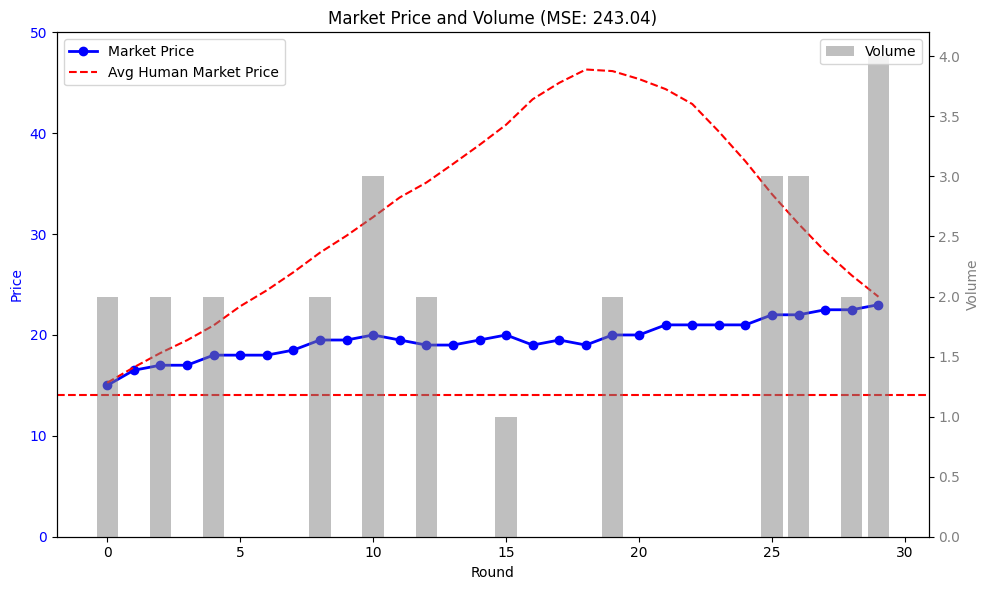

np.float64(243.03584949215147)

In [88]:
def model_vs_human_rationality(model, run, mean_price):
        
    exp1 = load_json_files(agent_runs[model][run])

    # Assuming `exp1` is already defined and populated
    price = []
    volume = []
    fundamental_price = 14

    for round in exp1.keys():
        if "Practice" in round:
            continue
        else:
            price.append(exp1[round][0]['market_state']['market_price'])
            volume.append(exp1[round][0]['market_state']['volume'])

        # Calculate Mean Squared Error (MSE)
    mse = np.mean((np.array(price) - mean_price) ** 2)

    # Plotting
    fig, ax1 = plt.subplots(figsize=(10, 6))

    # Price line plot
    ax1.plot(price, label="Market Price", color="blue", marker="o", linewidth=2)
    ax1.plot(mean_price, color="red", linestyle="--", label="Avg Human Market Price")
    ax1.set_ylabel("Price", color="blue")
    ax1.set_xlabel("Round")
    ax1.set_ylim(0, 50)
    ax1.tick_params(axis="y", labelcolor="blue")
    ax1.legend(loc="upper left")
    ax1.axhline(fundamental_price, color="red", linestyle="--", label="Fundamental Price (14)")


    # Volume bar chart
    ax2 = ax1.twinx()
    ax2.bar(range(len(volume)), volume, alpha=0.5, color="gray", label="Volume")
    ax2.set_ylabel("Volume", color="gray")
    ax2.tick_params(axis="y", labelcolor="gray")
    ax2.legend(loc="upper right")

    # Title including MSE
    plt.title(f"Market Price and Volume (MSE: {mse:.2f})")

    # Adjust layout and show the plot
    plt.tight_layout()
    plt.show()

    return mse




model_vs_human_rationality('gpt-3.5','run-1', mean_price)

## All markets

gpt-3.5
run-1


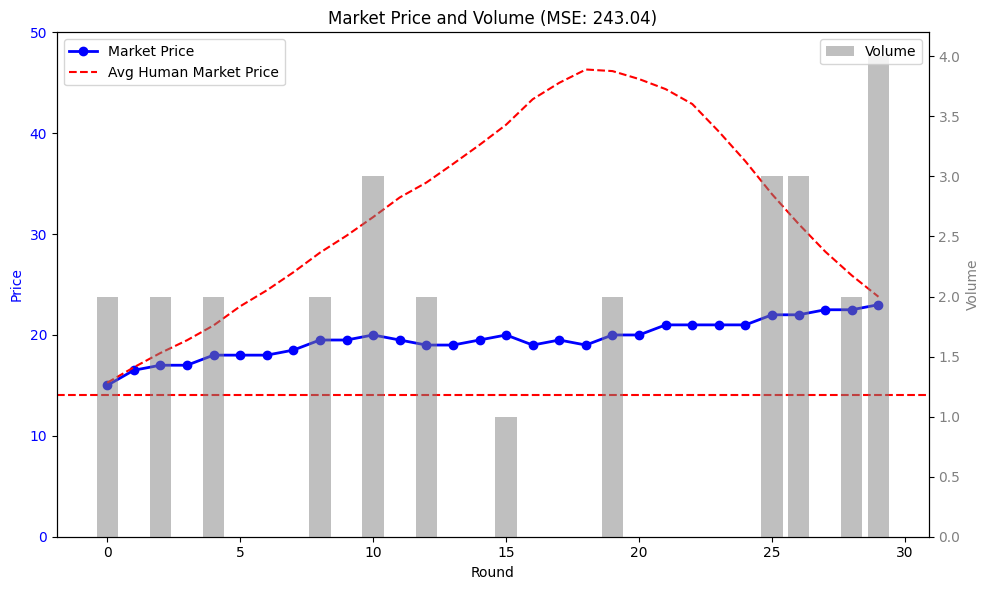

run-2


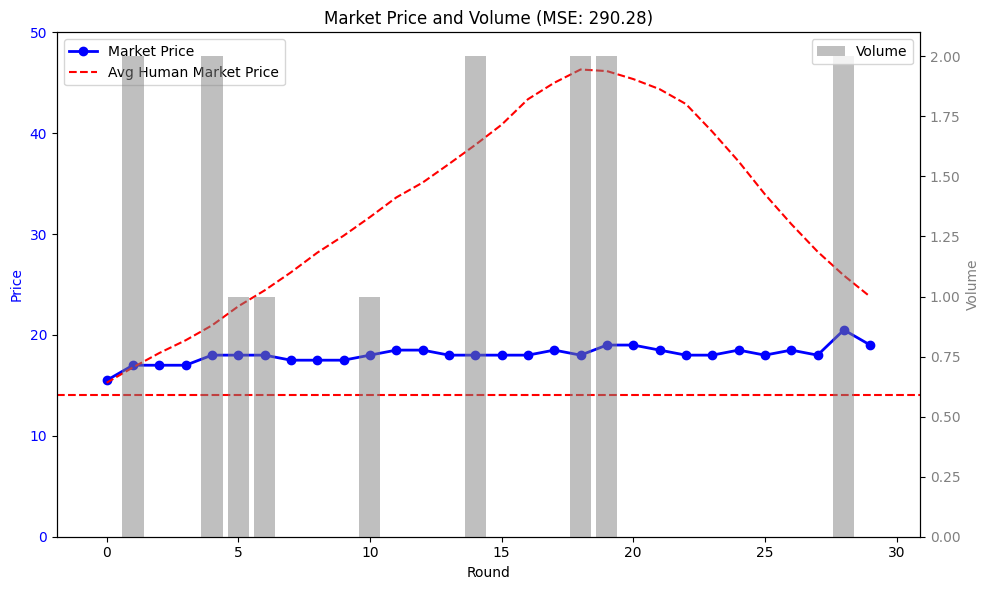

run-3


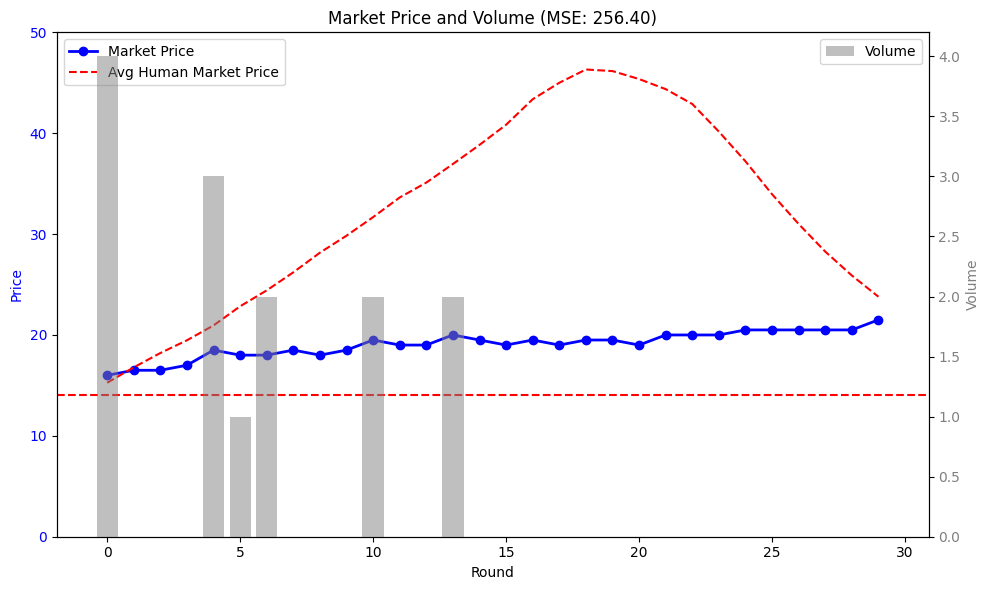

gemini-1.5-pro
run-4
run-5


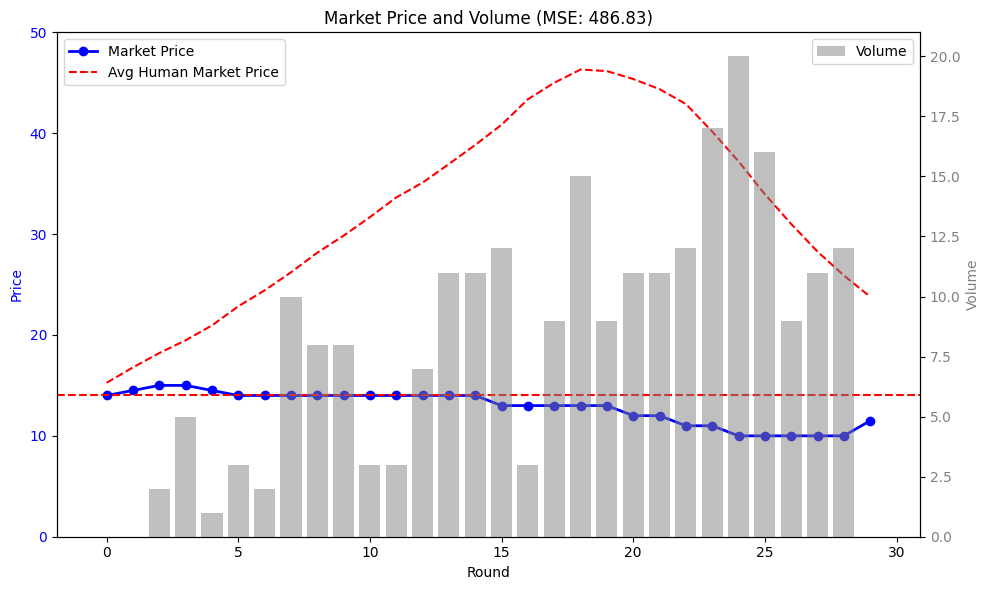

run-6


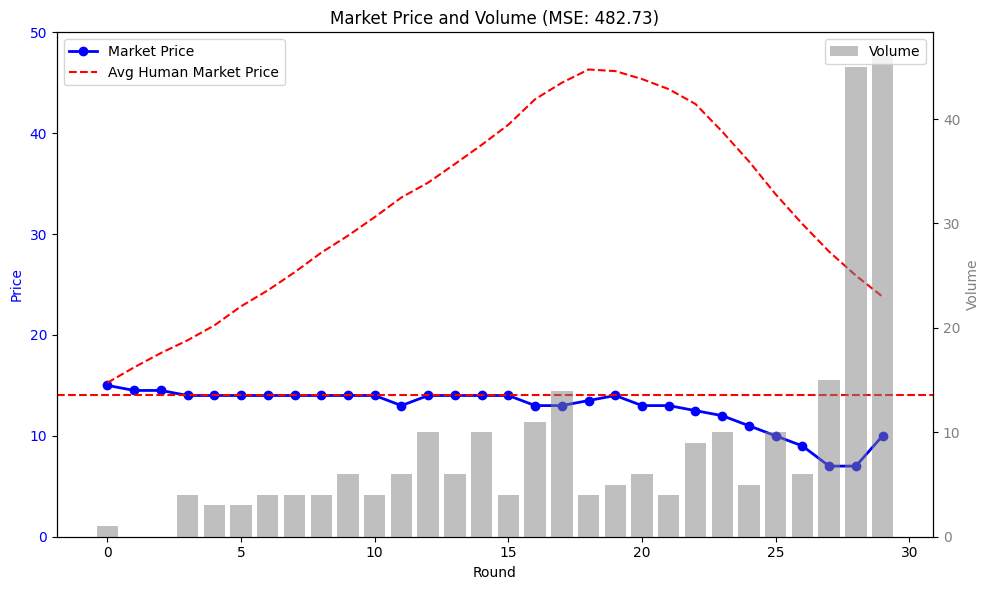

run-7


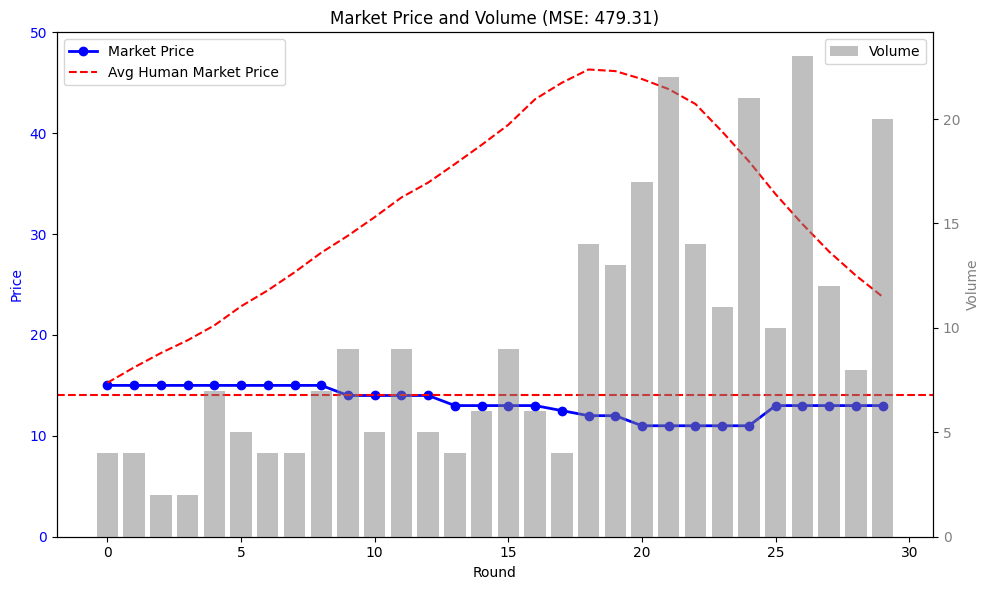

gpt-4o
run-8


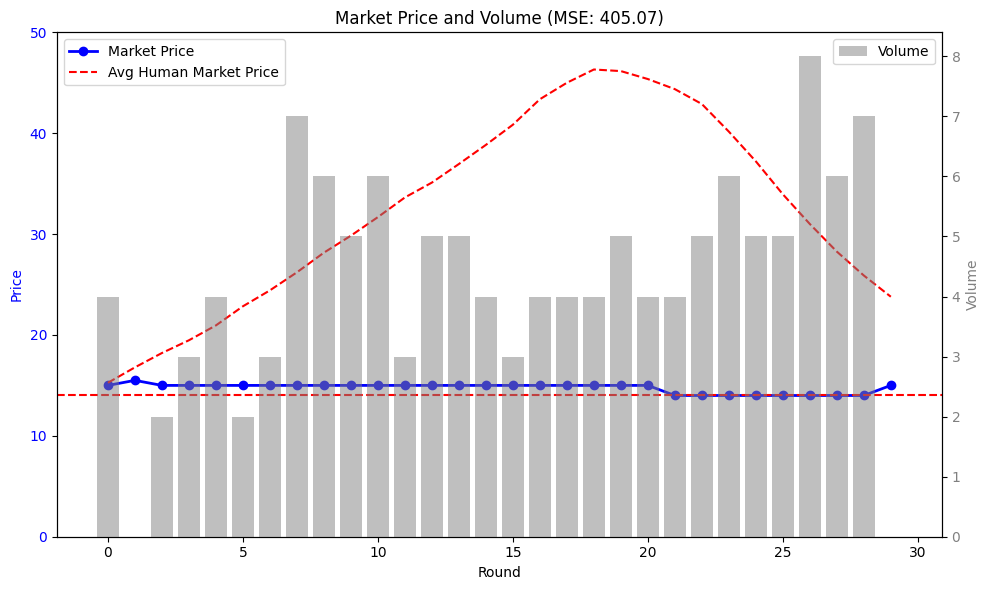

run-9


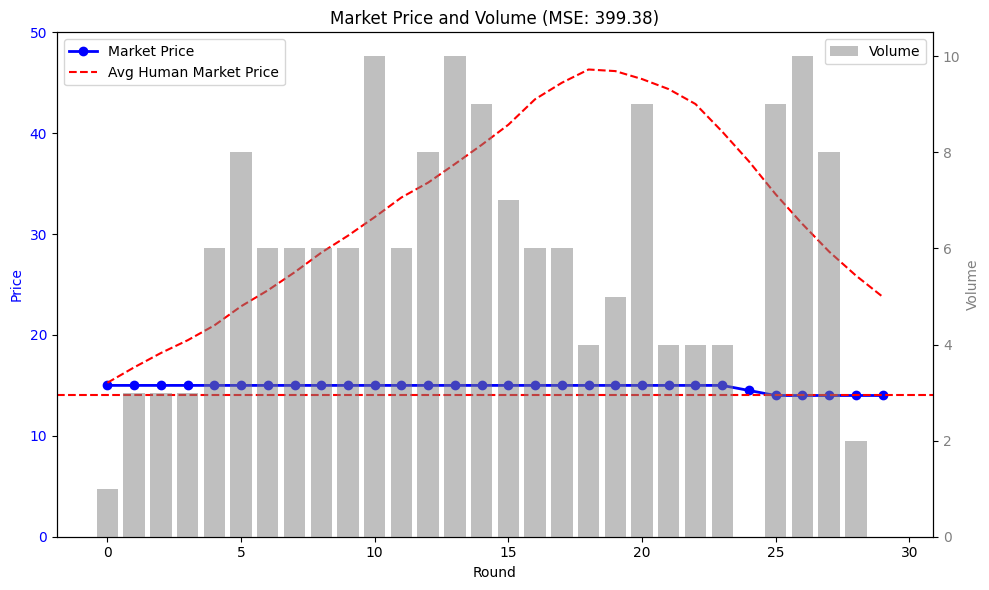

run-10


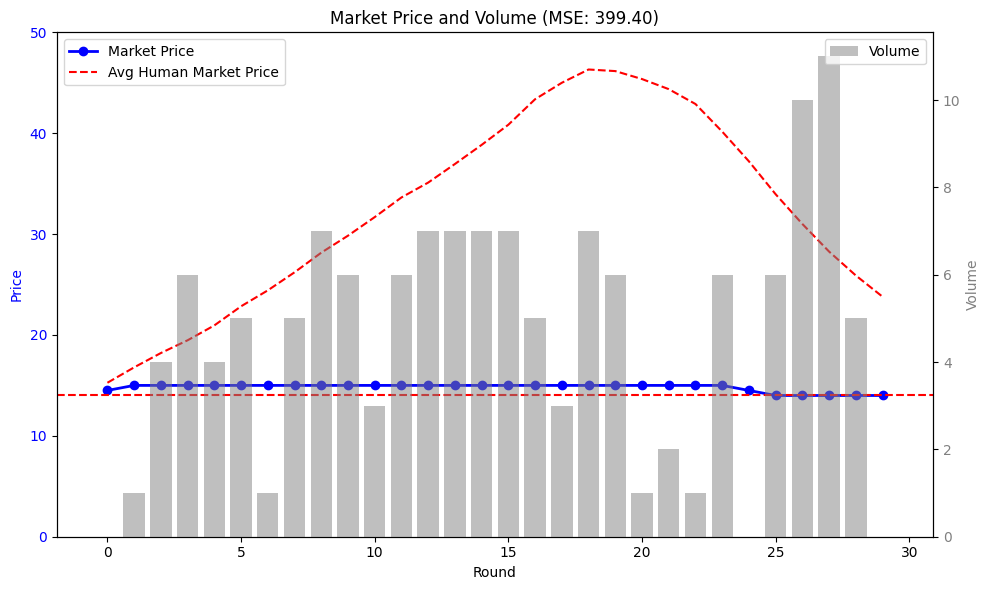

mistral-large
run-11


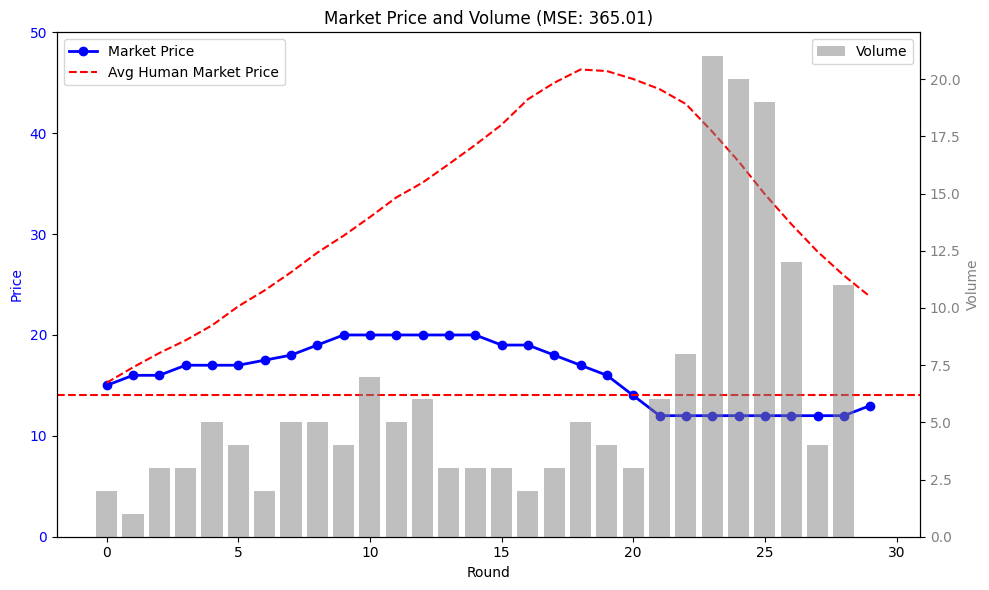

run-12


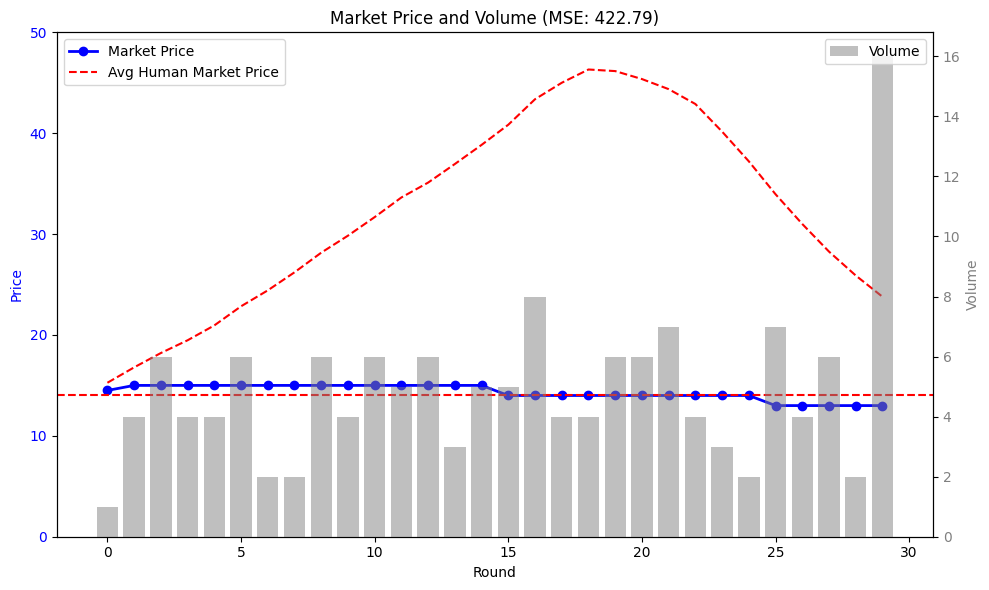

run-13


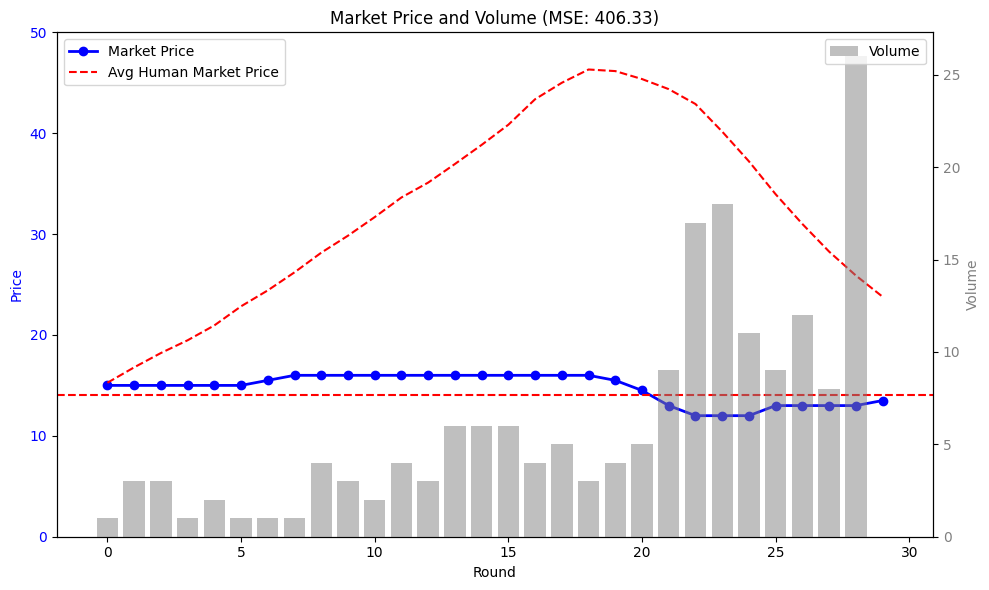

grok-2
run-14


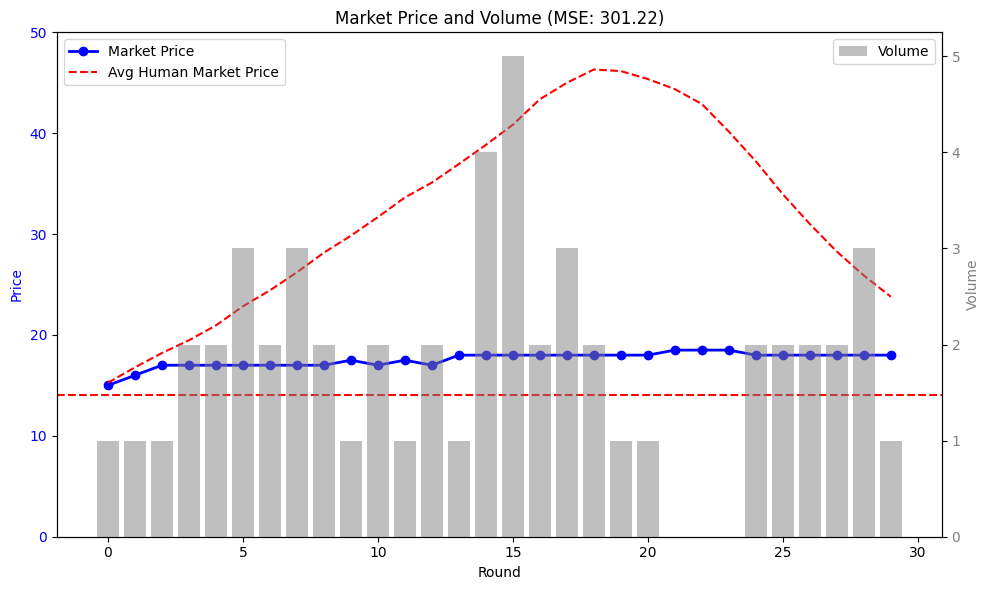

run-15


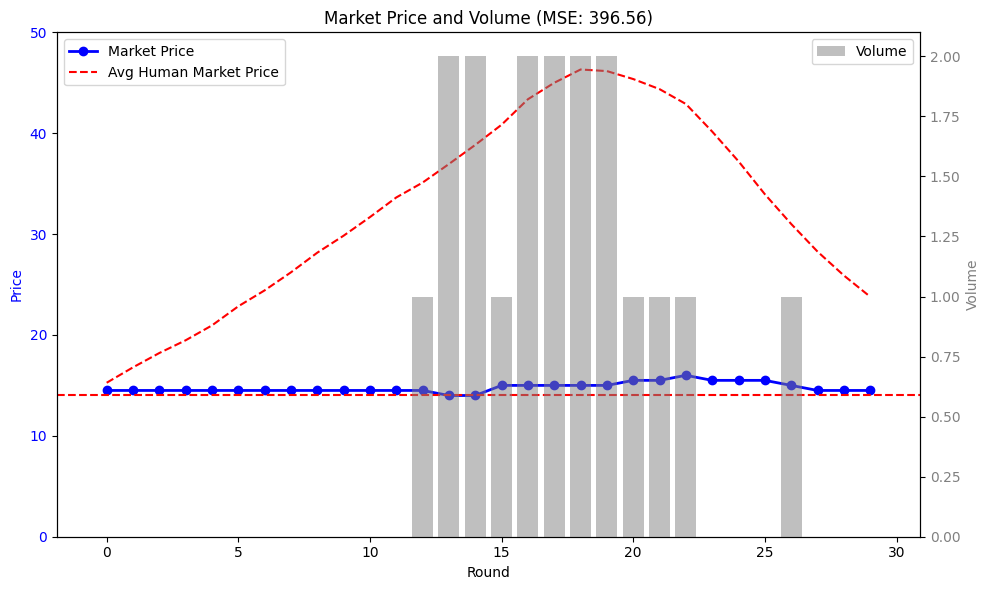

run-16
run-17
run-18


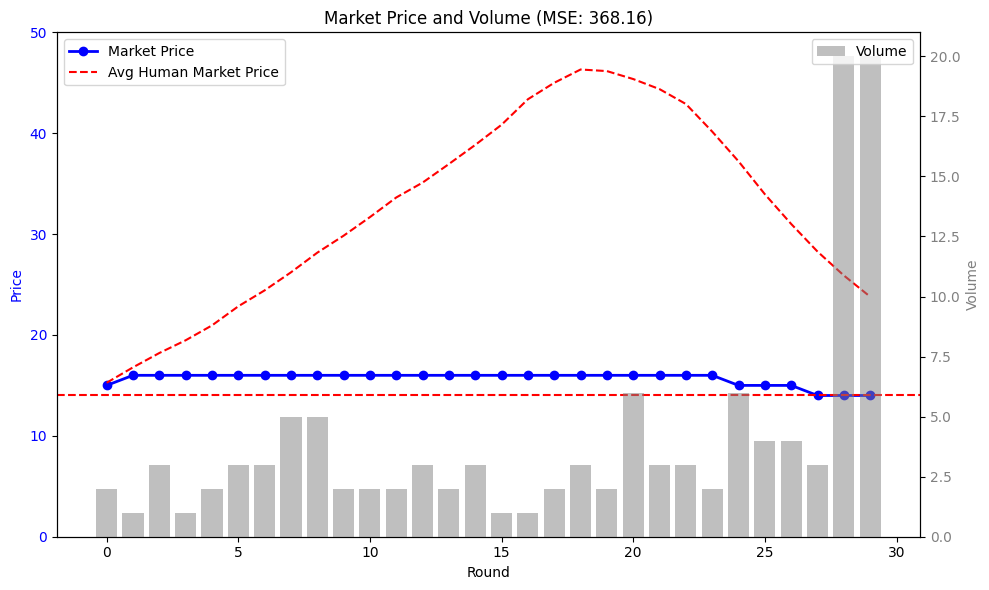

claude-3.5-sonnet
run-19


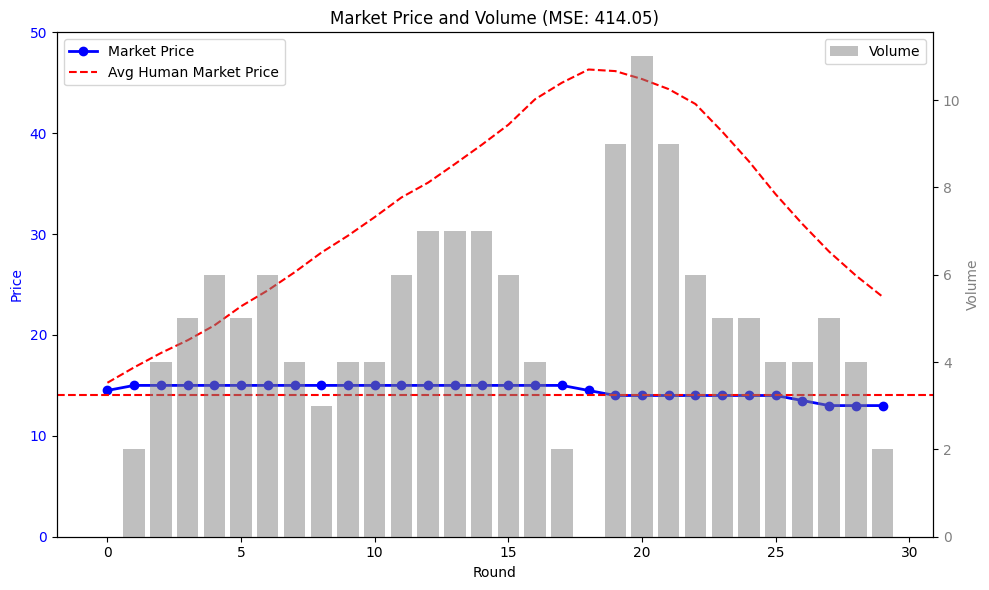

run-20


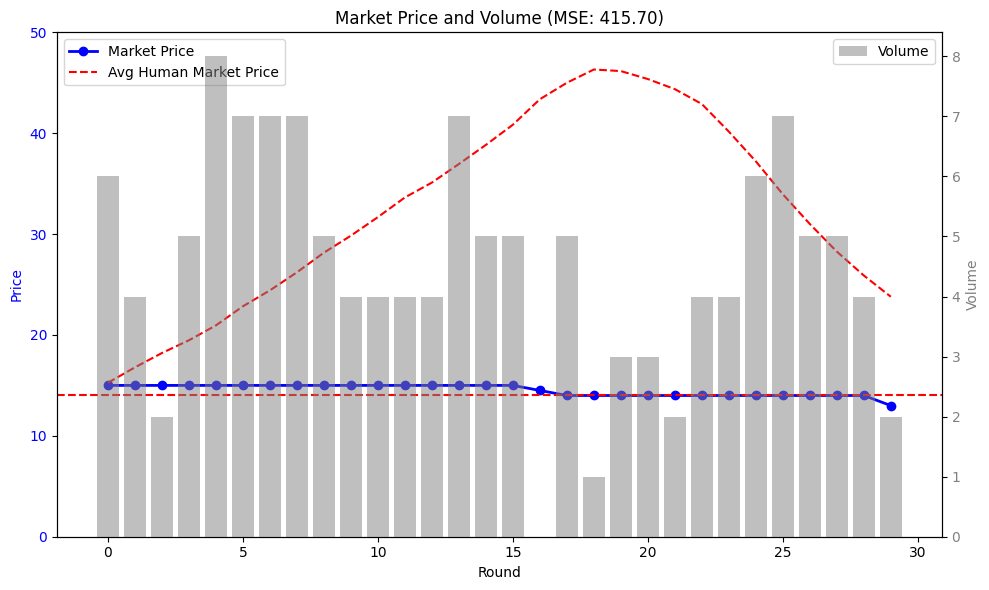

run-21


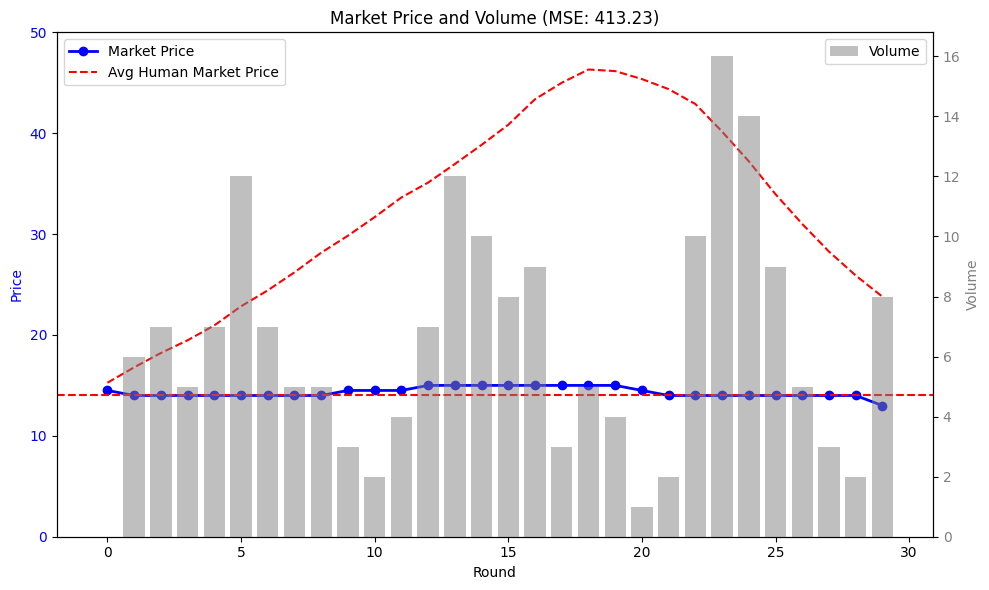

mixed
run-22


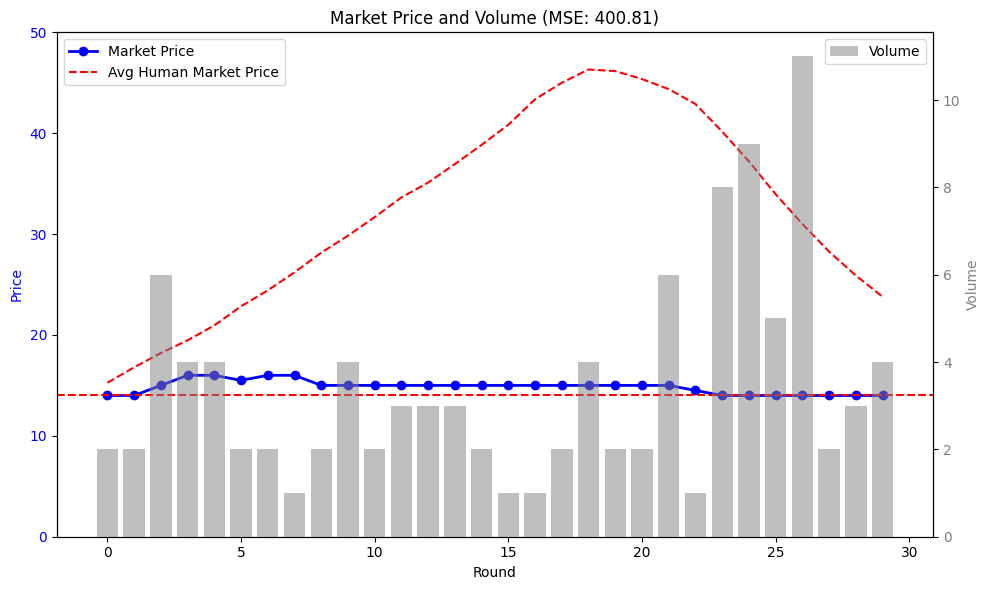

run-23


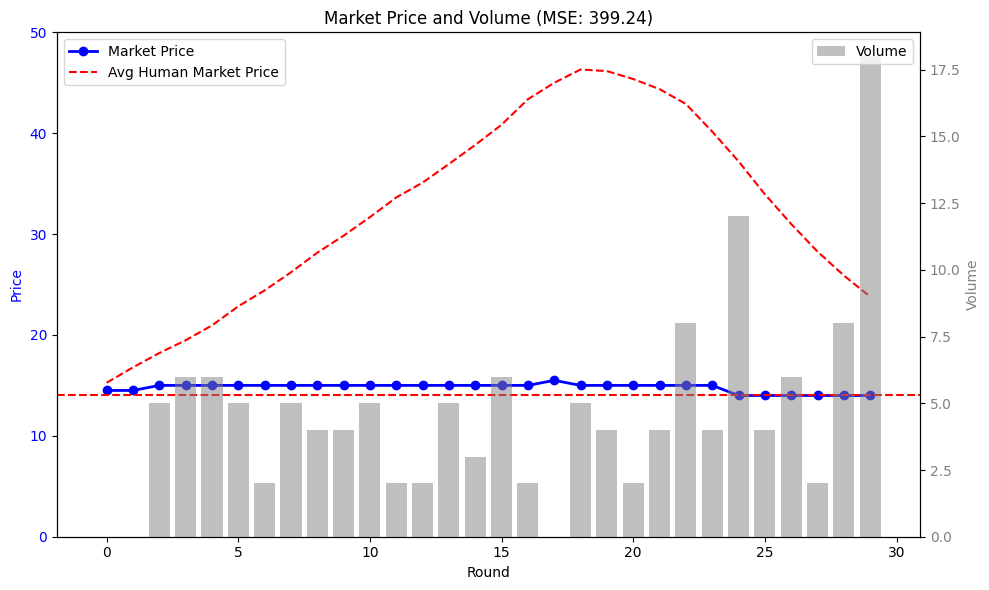

run-24


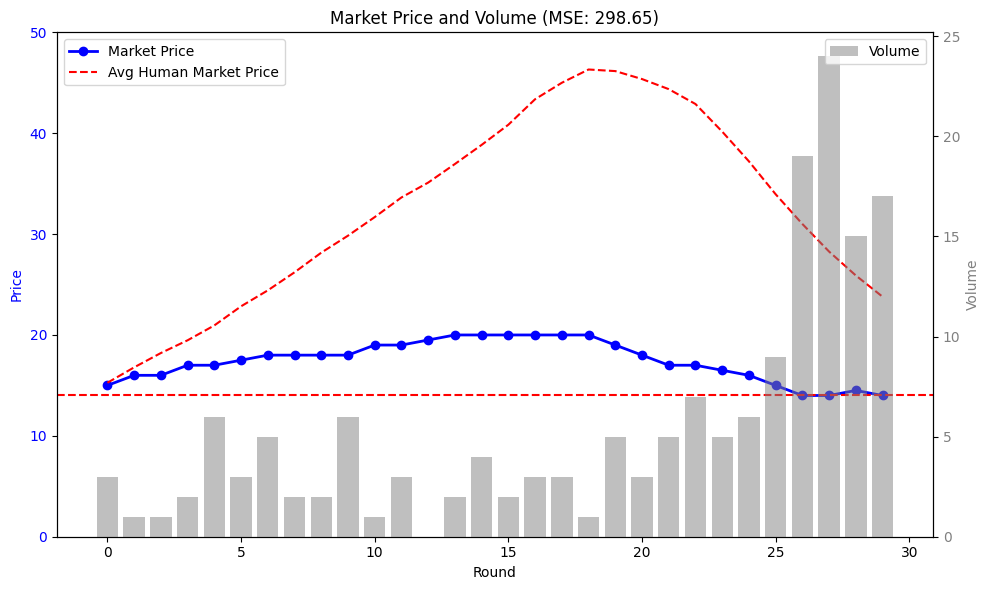

In [89]:
model_mse = {}
for model in agent_runs.keys():
    print(model)
    model_mse[model] = []
    for run in agent_runs[model].keys():
        print(run)
        try: 
            model_mse[model].append(model_vs_human_rationality(model, run, mean_price))
        except:
            continue

## Average MSE

In [90]:
for model in model_mse.keys():
    print(model)
    print(np.mean(model_mse[model]))

gpt-3.5
263.23687288396434
gemini-1.5-pro
482.9585103108648
gpt-4o
401.2836565096954
mistral-large
398.0430132348415
grok-2
355.31435826408136
claude-3.5-sonnet
414.3291243459526
mixed
366.2326331178825


## Distribution

In [ ]:
full_data = pd.read_excel(r"/Users/thenning/Documents/GitHub/neurobubbles_rachael-master_tom/data/return_prediction/data_19markets_panel_570obs_mod.xlsx", engine="openpyxl")
full_data.columns